# 데이터 분할

- 머신러닝 모델의 성능을 정확하게 평가하기 위해서는 훈련에 사용하지 않은 테스트 세트를 통해 평가해야함.

- 평가를 위한 별도의 데이터를 준비하거나 준비된 데이터 중에 일부를 떼어 테스트 세트로 준비 

- 훈련 : 테스트 비율은 70-80 / 20-30
    - 반드시 정해져 있는 것은 아니며 연구자의 임의로 조절 가능
    - 전체 데이터가 아주 크고 모든 데이터 패턴을 잘 담아내기만 한다면 테스트 데이터는 1%만 사용해도 충분할 수 있음. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('FISH.csv')
df = df[(df['Species']=='Bream')|(df['Species']=='Smelt')]
df = df[['Species', 'Weight', 'Length2']]

le = LabelEncoder()
df['label'] = le.fit_transform(df['Species'])

df.head()

,Species,Weight,Length2,label
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


In [3]:
df.shape

(49, 4)

In [7]:
df.Species.value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

# 샘플링 편향 (sampling bias)

- 훈련 세트에 도미 데이터와 빙어 데이터가 골고루 들어가있지 않다면 올바르게 분류할 수 없음.
    - 예) 빙어 없이 모델 훈련이 이뤄진다면 어떤 데이터를 빙어로 분류해야할지 알 수 없음. 
    
    
- train_test_split()
    - 전달되는 리스트나 배열을 섞은 후 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주는 함수 
    
    - random_state
        - 매번 코드를 실행할 때마다 다른 결과가 나온다면 정확하게 모델을 평가할 수 없고 모델 최적화에 어려움이 있음. 
        - 난수를 생성할 때 특정한 규칙으로 생성해서 매번 같은 결과가 나오게 통제할 수 있음.
        
    - stratify (계층화하다, 층을 이루게 하다) 
        - 무작위로 데이터를 섞으면 샘플링 편향이 일어날 수 있기 때문에 기존 데이터의 비율과 같은 비율로 데이터를 나눌 수 있도록 할 수 있음. 
        - 35:14 비율이었어도 5:5 맞추지 않고 그대로 비율 맞춤 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[['Length2', 'Weight']], # 독립변수
                                                   df[['label']],              # 종속변수 
                                                   test_size=0.25,
                                                   stratify=df[['label']],
                                                   random_state=4) # int 값
print(len(x_train), len(x_test), len(y_train), len(y_test))

36 13 36 13


In [8]:
y_test

,label
8,0
153,1
26,0
7,0
5,0
155,1
148,1
9,0
145,1
18,0


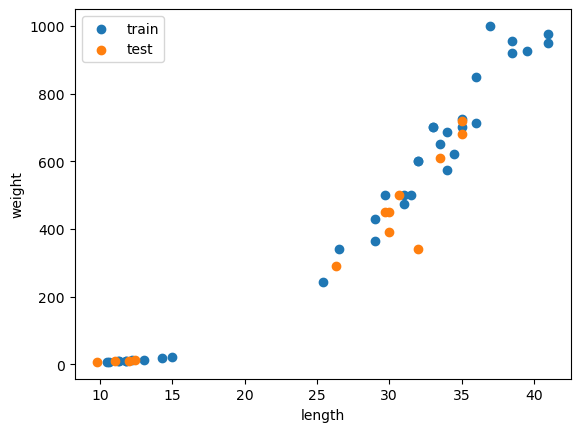

In [10]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(x_train['Length2'], x_train['Weight'], label='train')
plt.scatter(x_test['Length2'], x_test['Weight'], label='test')

plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 모델 훈련 

In [11]:
knn = KNeighborsClassifier() # 디폹트 k=5

knn.fit(x_train, y_train)

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# 모델 평가

In [15]:
knn.score(x_test, y_test)

1.0

# 모델 예측 

In [14]:
a = knn.predict([[25,200]]) # array([0])
le.inverse_transform(a)

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Bream'], dtype=object)

# 모델 최적화 

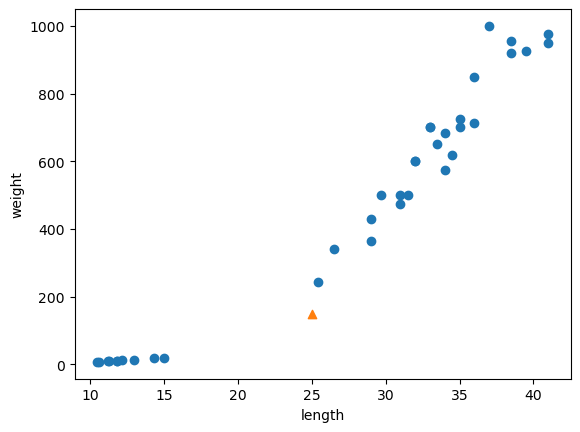

In [17]:
plt.figure()

plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1])
plt.scatter(25, 150, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 예측 오류

In [18]:
knn.predict([[25, 150]])
# 도미(0) 인데 빙어(1)로 예측해버림 

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

- kneighbors() 함수
    - 이웃까지의 거리와 이웃 샘플의 인덱스 반환 

In [19]:
dist, idx = knn.kneighbors([[25,150]])
print(dist)
print(idx)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[30 14  5  0 31]]


C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [24]:
idx.flatten() # x_train 기준 인덱스 

array([30, 14,  5,  0, 31], dtype=int64)

In [26]:
x_train

,Length2,Weight
156,13.0,12.2
30,38.5,920.0
27,36.0,714.0
2,26.5,340.0
34,41.0,950.0
157,14.3,19.7
22,34.5,620.0
25,35.0,725.0
147,10.6,7.0
33,41.0,975.0


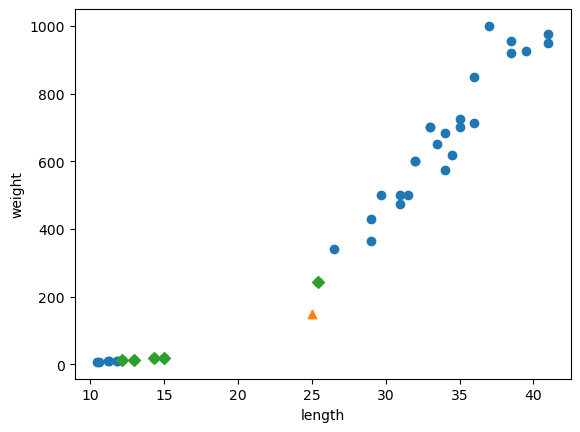

In [23]:
plt.figure()

plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(x_train.iloc[idx.flatten(),0], x_train.iloc[idx.flatten(),1], marker='D')

plt.ylabel('weight')
plt.xlabel('length')
plt.show()

- 도미 1개, 빙어 4개가 가장 가깝게 찍힘 --> 뭐가 문제일까 ?

In [25]:
x_train.iloc[idx.flatten(), :]

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
157,14.3,19.7
156,13.0,12.2
154,12.2,12.2


- x축은 범위가 좁고, y축은 범위가 넓기 때문에, y축으로 조금만 차이가 벌어져도 큰 값으로 거리가 계산됨. 

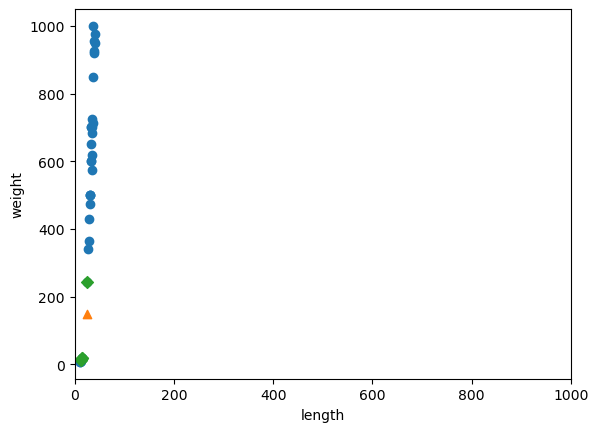

In [28]:
# x,y축을 동일 범위로 시각화
plt.figure()

plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(x_train.iloc[idx.flatten(),0], x_train.iloc[idx.flatten(),1], marker='D')

plt.xlim((0,1000)) # x도 y와 범위 똑같이 
plt.ylabel('weight')
plt.xlabel('length')
plt.show()

- 시각화 자료를 참고하면 현재 데이터에서 생선의 길이는 모델이 값을 예측하는데에 거의 사용되지 않고 있음. 
    - 두 독립변수의 단위가 다르기 때문에 
    
    
- knn은 특히 데이터 간 거리가 모델 성능에 영향을 많이 주는 특성이 있음. 
    - 각 독립변수의 단위가 다르면 올바른 예측이 어려울 가능성이 높음. 
    
    
- 각 독립변수의 단위를 일정한 기준으로 맞춰주는 작업을 "스케일링"(scaling)이라고 함.

# 스케일링 

- 스탠다드 스케일링 (standard scaling) = 수능 표준점수 
    - 각 피처 값이 0에서 표준편차의 몇 배만큼 떨어져있는지를 나타내 데이터의 단위와 관계없이 동일한 조건으로 비교할 수 있게 변환 
        - 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균 
        - 표준편차 : 분산의 제곱근. 데이터가 분산된 정도. 퍼져있는 정도 
        
    - 계산식
        - (특성값 - 평균) / 표준편차 
        - 음수도 가능 

In [29]:
ss = StandardScaler()

scaled_x_train = ss.fit_transform(x_train)

scaled_x_train

array([[-1.4352528 , -1.37771675],
       [ 1.04930701,  1.29094648],
       [ 0.80572272,  0.68536747],
       [-0.1198976 , -0.4140818 ],
       [ 1.29289131,  1.3791376 ],
       [-1.30858896, -1.35566897],
       [ 0.65957214,  0.4090353 ],
       [ 0.708289  ,  0.71770422],
       [-1.66909372, -1.39300321],
       [ 1.29289131,  1.4526302 ],
       [ 0.19189029,  0.05627083],
       [ 0.41598785,  0.35024123],
       [-1.55217326, -1.38418409],
       [ 0.51342156,  0.64421162],
       [-1.24038536, -1.35508103],
       [ 0.51342156,  0.64421162],
       [-1.60089012, -1.38800571],
       [ 0.36727099,  0.05627083],
       [ 0.31855413,  0.05627083],
       [ 0.41598785,  0.35024123],
       [ 0.61085528,  0.60011606],
       [ 0.80572272,  1.08516721],
       [-1.61063349, -1.38477204],
       [-1.55217326, -1.38447806],
       [ 0.56213842,  0.49722642],
       [ 0.61085528,  0.27674863],
       [ 0.12368669, -0.14950844],
       [ 0.31855413, -0.01722177],
       [ 1.04930701,

In [30]:
scaled_x_train.shape

(36, 2)

In [35]:
ss.transform([[25,150]])

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.26604818, -0.97262554]])

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


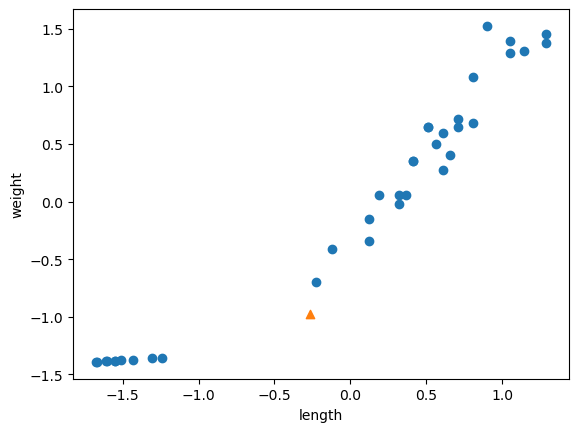

In [38]:
# 스케일링된 데이터 시각화 
plt.figure()

plt.scatter(scaled_x_train[:,0], scaled_x_train[:,1])

t = ss.transform([[25,150]]).flatten()
plt.scatter(t[0], t[1], marker='^')
# plt.scatter(x_train.iloc[idx.flatten(),0], x_train.iloc[idx.flatten(),1], marker='D')

# plt.xlim((0,1000)) # x도 y와 범위 똑같이 
plt.ylabel('weight')
plt.xlabel('length')
plt.show()

In [39]:
scaled_x_test = ss.transform(x_test)

In [40]:
knn = KNeighborsClassifier()

knn.fit(scaled_x_train, y_train)

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
knn.score(scaled_x_test, y_test)

1.0

In [42]:
# 이제 예측이 잘되는 모습 
knn.predict(ss.transform([[25,150]]))

C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

[[0.27324646 0.57734834 0.73754036 0.91072226 1.04671158]]
[[30  3 35 26 14]]



C:\Users\answl\anaconda3\envs\nlp\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


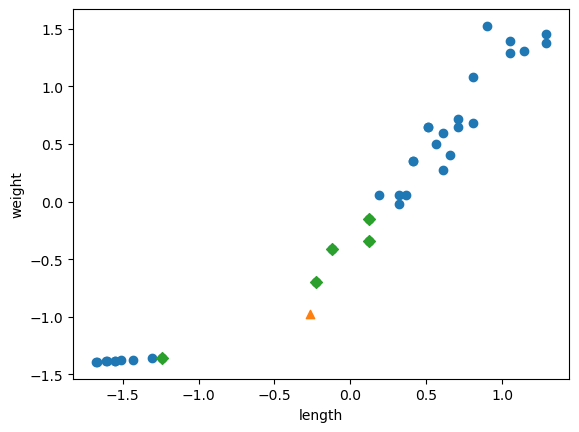

In [43]:
dist, idx = knn.kneighbors(ss.transform([[25,150]]))
print(dist)
print(idx)
print()

plt.figure()

plt.scatter(scaled_x_train[:,0], scaled_x_train[:,1])
plt.scatter(t[0], t[1], marker='^')
plt.scatter(scaled_x_train[idx.flatten(),0], scaled_x_train[idx.flatten(),1], marker='D')

plt.ylabel('weight')
plt.xlabel('length')
plt.show()